In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
import matplotlib.colors as colors
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
import random
%matplotlib inline

In [2]:
CAV = pd.read_csv("CAV.csv") #Dataframe containing data about trending videos in Canada
DEV = pd.read_csv("DEV.csv") #Dataframe containing data about trending videos in Germany
FRV = pd.read_csv("FRV.csv") #Dataframe containing data about trending videos in France
GBV = pd.read_csv("GBV.csv") #Dataframe containing data about trending videos in Great Britain
INV = pd.read_csv("INV.csv") #Dataframe containing data about trending videos in India
#JPV = pd.read_csv("JPvideos.csv") #Dataframe containing data about trending videos in Japan
#KRV = pd.read_csv("KRvideos.csv") #Dataframe containing data about trending videos in South Korea
#MXV = pd.read_csv("MXvideos.csv") #Dataframe containing data about trending videos in Mexico
#RUV = pd.read_csv("RUvideos.csv") #Dataframe containing data about trending videos in Russia
USV = pd.read_csv("USV.csv") #Dataframe containing data about trending videos in the USA
df= pd.concat([USV,INV,GBV,FRV,DEV,CAV],axis=0)


In [3]:
#Let's retake a look at the data in every dataframes to make sure the preprocessing was done right

In [4]:
CAV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420
1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339
3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989
4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082


In [5]:
CAV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
40876,40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99
40877,40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66
40878,40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224
40879,40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182
40880,40880,POTgw38-m58,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62


In [6]:
DEV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230
1,1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302
2,2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146
3,3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458
4,4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467


In [7]:
DEV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
40835,40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501
40836,40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119
40837,40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11
40838,40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421
40839,40839,go-F6xvezAM,18.14.06,Гироскутер - Азбука Уральских Пельменей Б - Ур...,Уральские Пельмени,23,2018-06-13T15:02:15.000Z,"Гироскутер|""уральские пельмени гироскутер""|""мя...",316328,11394,352


In [8]:
FRV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108
1,1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576
2,2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477
3,3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550
4,4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72


In [9]:
FRV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
40719,40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86
40720,40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999
40721,40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61
40722,40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74
40723,40723,_LgKglfnqlc,18.14.06,Mandoumbé ak Koor Gui 2018 Episode 28,Yesdakar,24,2018-06-13T19:45:14.000Z,"ramadan2018|""koorgui""|""Mandoumbé""",46604,947,37


In [10]:
GBV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247
1,1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294
2,2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420
3,3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12
4,4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2


In [11]:
GBV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
38740,38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783
38741,38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781
38742,38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892
38743,38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875
38744,38915,4YFo4bdMO8Q,18.14.06,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,2018-05-11T04:06:35.000Z,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274


In [12]:
INV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798
1,1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904
2,2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243
3,3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624
4,4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293


In [13]:
INV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
33081,37300,UPbi1oG5UPg,18.14.06,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,24,2018-06-08T13:54:39.000Z,"funny videos|""hotels""|""comedy""|""comedy video""|...",2675706,96485,4181
33082,37301,3MTCSll3KGU,18.14.06,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,17,2018-06-13T03:09:21.000Z,"wwe|""world wrestling entertainment""|""wrestling...",770873,13316,552
33083,37302,TIE92mUvSsw,18.14.06,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,1,2018-06-11T06:50:41.000Z,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...",27696924,468472,60025
33084,37319,1-0mS2ZBrQk,18.14.06,What If PubG Was Made In India ?,Angry Prash,23,2018-06-11T08:37:21.000Z,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,85601,4677
33085,37330,K10YIAokjvE,18.14.06,Funny Ramzan Scenes Part - 2 | Hyderabadi Come...,Warangal Diaries,23,2018-06-13T10:16:21.000Z,"warangal diaries|""latest""|""funny""|""comedy""|""Ba...",132055,11170,393


In [14]:
USV.head(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989


In [15]:
USV.tail(5)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes
40896,40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385
40897,40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382
40898,40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032
40899,40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846
40900,40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976


In [16]:
print("total number of rows and columns in the Canada videos file", CAV.shape)
print("total number of rows in the Germany videos file", DEV.shape)
print("total number of rows in the France videos file", FRV.shape)
print("total number of rows in the Great Britain videos file", GBV.shape)
print("total number of rows in the India videos file", INV.shape)
print("total number of rows in the US videos file", USV.shape)

total number of rows and columns in the Canada videos file (40881, 11)
total number of rows in the Germany videos file (40840, 11)
total number of rows in the France videos file (40724, 11)
total number of rows in the Great Britain videos file (38745, 11)
total number of rows in the India videos file (33086, 11)
total number of rows in the US videos file (40901, 11)


In [17]:
print("Different columns in the Canada video file", CAV.columns)
print("Different columns in the Germany video file", DEV.columns)
print("Different columns in the France video file", FRV.columns)
print("Different columns in the Great Britain video file", GBV.columns)
print("Different columns in the US video file", USV.columns)

Different columns in the Canada video file Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes'],
      dtype='object')
Different columns in the Germany video file Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes'],
      dtype='object')
Different columns in the France video file Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes'],
      dtype='object')
Different columns in the Great Britain video file Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes'],
      dtype='object')
Different columns in the US video file Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
     

In [18]:
print("Type of data in the different columns", USV.dtypes)

Type of data in the different columns Unnamed: 0        int64
video_id         object
trending_date    object
title            object
channel_title    object
category_id       int64
publish_time     object
tags             object
views             int64
likes             int64
dislikes          int64
dtype: object


In [19]:
#Checking for null values

In [20]:
USV[USV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [21]:
CAV[CAV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [22]:
GBV[GBV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [23]:
FRV[FRV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [24]:
DEV[DEV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [25]:
INV[INV.isnull().any(axis=1)].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [26]:
#Checking for duplicate rows

In [27]:
USV[USV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [28]:
CAV[CAV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [29]:
GBV[GBV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [30]:
FRV[FRV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [31]:
DEV[DEV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [32]:
INV[INV.duplicated()].head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [33]:
#We cans see that the unwanted columns were removed 
#We can also notice that there are no null values nor duplicate values
#Also the data start November, 14th 2017 and ends June,14th 2018 so over one year and 7 months
#Now let's add the category name to each of the country data frame and format the dates

In [34]:
USV['category_id'] = USV['category_id'].astype(str)
categories = pd.read_json('US_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']    

In [35]:
USV.insert(4, 'category', USV['category_id'].map(id_to_category))


In [36]:
CAV['category_id'] = CAV['category_id'].astype(str)
categories = pd.read_json('CA_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [37]:
CAV.insert(4, 'category', CAV['category_id'].map(id_to_category))

In [38]:
GBV['category_id'] = GBV['category_id'].astype(str)
categories = pd.read_json('GB_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [39]:
GBV.insert(4, 'category', GBV['category_id'].map(id_to_category))

In [40]:
FRV['category_id'] = FRV['category_id'].astype(str)
categories = pd.read_json('FR_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [41]:
FRV.insert(4, 'category', FRV['category_id'].map(id_to_category))

In [42]:
DEV['category_id'] = DEV['category_id'].astype(str)
categories = pd.read_json('DE_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [43]:
DEV.insert(4, 'category', DEV['category_id'].map(id_to_category))

In [44]:
INV['category_id'] = INV['category_id'].astype(str)
categories = pd.read_json('IN_category_id.json')
id_to_category = {}
for category in categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [45]:
INV.insert(4, 'category', INV['category_id'].map(id_to_category))

In [46]:
USV['trending_date'] = pd.to_datetime(USV['trending_date'], format='%y.%d.%m')
CAV['trending_date'] = pd.to_datetime(CAV['trending_date'], format='%y.%d.%m')
GBV['trending_date'] = pd.to_datetime(GBV['trending_date'], format='%y.%d.%m')
FRV['trending_date'] = pd.to_datetime(FRV['trending_date'], format='%y.%d.%m')
DEV['trending_date'] = pd.to_datetime(DEV['trending_date'], format='%y.%d.%m')
INV['trending_date'] = pd.to_datetime(INV['trending_date'], format='%y.%d.%m')

In [47]:
#Let's check pick into the dataframes to see if the categories name were added and the date were formatted.

In [48]:
USV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,Entertainment,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Entertainment,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,Entertainment,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989


In [49]:
CAV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,Music,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420
1,1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,Comedy,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339
3,3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,Entertainment,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989
4,4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Music,Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082


In [50]:
GBV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,Howto & Style,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247
1,1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Entertainment,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294
2,2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,Music,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420
3,3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Sports,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12
4,4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,News & Politics,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2


In [51]:
FRV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,Ro6eob0LrCY,2017-11-14,Malika LePen : Femme de Gauche - Trailer,Entertainment,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108
1,1,Yo84eqYwP98,2017-11-14,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Entertainment,Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576
2,2,ceqntSXE-10,2017-11-14,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Comedy,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477
3,3,WuTFI5qftCE,2017-11-14,PAPY GRENIER - METAL GEAR SOLID,Gaming,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550
4,4,ee6OFs8TdEg,2017-11-14,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Sports,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72


In [52]:
DEV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,Entertainment,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230
1,1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,Comedy,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302
2,2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,Entertainment,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146
3,3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,Education,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458
4,4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),Entertainment,rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467


In [53]:
INV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Film & Animation,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798
1,1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics,HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904
2,2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Entertainment,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243
3,3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Comedy,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624
4,4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293


In [54]:
#Earvin questions

In [55]:
USV_DEC = USV['2017-12-01' <= USV.trending_date]

In [56]:
USV_DEC = USV_DEC[USV_DEC.trending_date <= '2017-12-31']

In [57]:
USV_DEC

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
3400,3400,6ZfuNTqbHE8,2017-12-01,Marvel Studios' Avengers: Infinity War Officia...,Entertainment,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157727,34077
3401,3401,nx1R-eHSkfM,2017-12-01,The New Snapchat in 60 Seconds,Music,Snapchat,10,2017-11-29T14:00:03.000Z,"new snapchat|""version 2""|""snap inc""|""brandnew""...",1894443,0,0
3402,3402,XbuQAbG2AZ0,2017-12-01,"Jay-Z and Dean Baquet, in Conversation",News & Politics,The New York Times,25,2017-11-30T14:30:00.000Z,"The New York Times|""NY Times""|""NYT""|""Times Vid...",224270,7006,331
3403,3403,evhLzq7Gsak,2017-12-01,Matt Lauer Has Been Fired From NBC News | TODAY,News & Politics,TODAY,25,2017-11-29T14:42:32.000Z,"The TODAY Show|""TODAY Show""|""TODAY""|""NBC""|""NBC...",1717225,10041,4266
3404,3404,KXHrCBkIxQQ,2017-12-01,ALL THE MONEY IN THE WORLD - Official Trailer ...,Entertainment,Sony Pictures Entertainment,24,2017-11-29T20:00:53.000Z,"mark wahlberg|""marky mark""|""all the money in t...",616077,5816,934
3405,3405,8z_cg5CypRc,2017-12-01,Kelly Clarkson Carpool Karaoke,Entertainment,The Late Late Show with James Corden,24,2017-11-30T06:30:56.000Z,"James Corden|""The Late Late Show""|""Colbert""|""l...",3074263,96530,1011
3406,3406,TsT5GLWgSkU,2017-12-01,Reacting to Avengers: Infinity War trailer,Comedy,jacksfilms,23,2017-11-29T23:25:44.000Z,"jacksfilms|""react""|""reacting""|""reaction""|""infi...",806797,75413,2078
3407,3407,LU6xDgpnIyM,2017-12-01,CONFRONTING MY DAD,Comedy,shane,23,2017-11-29T20:00:02.000Z,"shanedawsontv|""shane""|""dawson""|""vlogs""|""iphone...",3657886,442915,2655
3408,3408,k_aT3jAK_QU,2017-12-01,Justin Timberlake And Stephen Harmonize The Na...,Entertainment,The Late Show with Stephen Colbert,24,2017-11-30T08:35:00.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",372262,3332,286
3409,3409,aT1gOazMMm8,2017-12-01,James Franco Brings Tommy Wiseau to Kimmel,Entertainment,Jimmy Kimmel Live,24,2017-11-30T11:00:00.000Z,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",842514,17356,308


In [58]:
def print_USV_DEC(column_of_interest,column_stats):
    US_D = USV_DEC.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return US_D.sort_values(ascending=False).head(10)

In [59]:
print_USV_DEC('category', 'views')

category
Entertainment           3054867831
Music                   2234885386
Comedy                   645468359
Howto & Style            534604477
People & Blogs           462597426
Film & Animation         347868839
Sports                   234659809
Science & Technology     219245688
News & Politics          175845323
Education                122329399
Name: views, dtype: int64

In [60]:
USV_JAN = USV[USV['trending_date'] >= '2018-01-01']

In [61]:
USV_JAN = USV_JAN[USV_JAN.trending_date <= '2018-01-31']

In [62]:
USV_JAN

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
9600,9600,x4TZEVqKIvs,2018-01-01,Film Theory: Disney LIED to You! (High School ...,Film & Animation,The Film Theorists,1,2017-12-30T20:15:11.000Z,"high school musical|""disney""|""high school musi...",2993235,135820,6207
9601,9601,PjqKPHZJgF0,2018-01-01,Lil Wayne - Family Feud feat. Drake (Official ...,Music,Lil Wayne,10,2017-12-29T22:59:01.000Z,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020,97709,4748
9602,9602,O6BODAJVYc8,2018-01-01,"2017, in 7 minutes",News & Politics,Vox,25,2017-12-30T13:00:04.000Z,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942,69361,13150
9603,9603,mDRifR9HdK8,2018-01-01,Best Pet Videos of the Year 2017!,Pets & Animals,The Pet Collective,15,2017-12-30T14:00:04.000Z,"the pet collective|""pet collective""|""the pet c...",277046,6878,265
9604,9604,HqwVFXyCfOI,2018-01-01,Best of Hevesh5 (8),Entertainment,Hevesh5,24,2017-12-30T18:00:01.000Z,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580,7512,451
9605,9605,MMu-_KRZhwM,2018-01-01,Tips for a Fun New Year’s Eve,Comedy,CollegeHumor,23,2017-12-30T17:03:47.000Z,"Collegehumor|""CH originals""|""comedy""|""sketch c...",555596,20430,1109
9606,9606,S45Y5WQ4Ucs,2018-01-01,Clumsy Puppy Steals Lettuce: Cute Puppy Potpie...,Pets & Animals,Maymo,15,2017-12-29T18:58:17.000Z,"maymo|""dog""|""dogs""|""puppy""|""puppies""|""cute pup...",1008286,13518,1367
9607,9607,j6X6PhexHnE,2018-01-01,If People Were Honest With Their Parents,Comedy,Tpindell,23,2017-12-30T03:16:10.000Z,"If People Were Honest With Their Parents|""If W...",357154,18639,726
9608,9608,7VnEPIBsp20,2018-01-01,Zac Efron Made Michael Jackson Cry! | The Grah...,Entertainment,The Graham Norton Show,24,2017-12-29T15:30:01.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1147511,28260,1484
9609,9609,oX8-6whswEA,2018-01-01,Star Wars The Last Jedi Throne Room Scene in LEGO,Film & Animation,Huxley Berg Studios,1,2017-12-29T18:59:01.000Z,"star wars|""the last jedi""|""snoke""|""snokes deat...",413945,9446,367


In [63]:
def print_USV_JAN(column_of_interest,column_stats):
    US_J = USV_JAN.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return US_J.sort_values(ascending=False).head(10)

In [64]:
print_USV_JAN('category', 'views')

category
Music                   2034296336
Entertainment           1291889488
Comedy                   620505089
Film & Animation         478759602
Sports                   381111528
People & Blogs           378284697
Howto & Style            323431872
Gaming                   183918099
News & Politics          173316926
Science & Technology     159985061
Name: views, dtype: int64

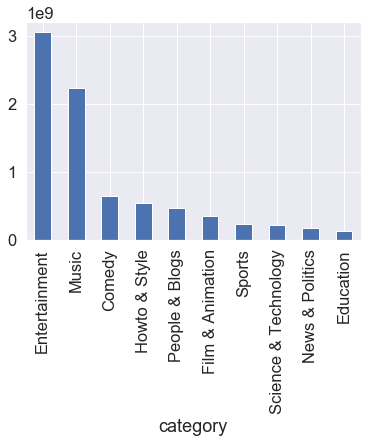

In [65]:
print_USV_DEC('category', 'views').plot(kind = 'bar', x = 'category', y = 'views')

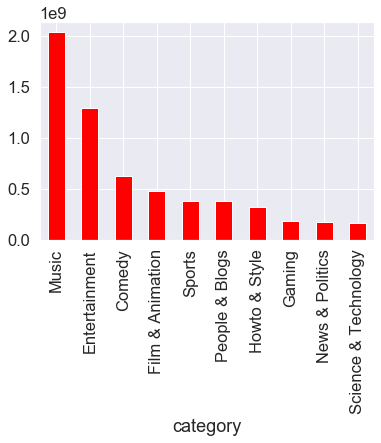

In [66]:
print_USV_JAN('category', 'views').plot(kind = 'bar', x = 'category', y = 'views', color = 'red')

In [67]:
#As we can see from December to January of the following year, Sport has went from being 7th in term of views to 5th.
#Also, we observe that even though Music and enterntainment remain at the top, they drastically decrease their number of views
#My hypothese is that going intoi the new year people make their new year resolutions.
#And one of the big goal that comes back each year is exercise more so that why sport videos go up from December to January.

In [68]:
#Kamal Questions

In [69]:
#Question 4: Is there a consistent ratio of likes to dislike of the trending videos, compared to other other country?

In [70]:
# Transform trending_date to datetime date format to match the date format
USV['trending_date'] = pd.to_datetime(USV['trending_date'], format='%y.%d.%m').dt.date
USV.trending_date.value_counts().sort_index(inplace=True)
USV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,Entertainment,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Entertainment,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,Entertainment,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989


In [71]:
# Transform trending_date to datetime date format to get match the date format
CAV['trending_date'] = pd.to_datetime(CAV['trending_date'], format='%y.%d.%m').dt.date
CAV.trending_date.value_counts().sort_index(inplace=True)
CAV.head()

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
0,0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,Music,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420
1,1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,Comedy,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339
3,3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,Entertainment,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989
4,4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Music,Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082


In [72]:
# Changing the publish_time to datetime format to mach the date format
publish_time = pd.to_datetime(CAV.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create Variable publish_date to get the desire result
CAV['publish_time'] = publish_time.dt.date

# Drop publish_time
#CAV.drop('publish_date',axis=1,inplace=True)
# Dataset is sorted by trending_date
pd.Index(CAV.trending_date).is_monotonic

True

In [73]:
# Transforming publish_time to datetime
publish_date = pd.to_datetime(USV.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create Variable publish_date
USV['publish_date'] = publish_time.dt.date

# Drop publish_time
USV.drop('publish_time',axis=1,inplace=True)
# Dataset is sorted by trending_date
pd.Index(USV.trending_date).is_monotonic

True

In [74]:
# Create New Variable Counting Days to Achieving Trending Status
CAV['days_to_trending'] = (CAV.trending_date - CAV.publish_time).dt.days
CAV.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40881.000000
mean         3.481495
std         59.735969
min          0.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          2.000000
95%          4.000000
max       3658.000000
Name: days_to_trending, dtype: float64

In [75]:
# Create New Variable Counting Days to Achieving Trending Status from the dataset
USV['days_to_trending'] = (USV.trending_date - USV.publish_date).dt.days
USV.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40881.000000
mean         3.376214
std         59.740056
min         -7.000000
5%           0.000000
25%          1.000000
50%          1.000000
75%          2.000000
95%          4.000000
max       3658.000000
Name: days_to_trending, dtype: float64

In [76]:
USV.set_index(['trending_date','video_id'],inplace=True)
USV.head(15)

Unnamed: 0  \
trending_date video_id                  
2017-11-14    2kyS6SvSYSE           0   
              1ZAPwfrtAFY           1   
              5qpjK5DgCt4           2   
              puqaWrEC7tY           3   
              d380meD0W0M           4   
              gHZ1Qz0KiKM           5   
              39idVpFF7NQ           6   
              nc99ccSXST0           7   
              jr9QtXwC9vc           8   
              TUmyygCMMGA           9   
              9wRQljFNDW8          10   
              VifQlJit6A0          11   
              5E4ZBSInqUU          12   
              GgVmn66oK_A          13   
              TaTleo4cOs8          14   

                                                                       title  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
              d380meD0W0M                           I Dare You: GOING BALD!?   
              gHZ1Qz0KiKM                              2 Weeks with iPhone X   
              39idVpFF7NQ          Roy Moore & Jeff Sessions Cold Open - SNL   
              nc99ccSXST0                5 Ice Cream Gadgets put to the Test   
              jr9QtXwC9vc  The Greatest Showman | Official Trailer 2 [HD]...   
              TUmyygCMMGA  Why the rise of the robots won’t mean the end ...   
              9wRQljFNDW8  Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...   
              VifQlJit6A0  (SPOILERS) 'Shiva Saves the Day' Talked About ...   
              5E4ZBSInqUU         Marshmello - Blocks (Official Music Video)   
              GgVmn66oK_A             Which Countries Are About To Collapse?   
              TaTleo4cOs8                           SHOPPING FOR NEW FISH!!!   

                                       category          channel_title  \
trending_date video_id                                                   
2017-11-14    2kyS6SvSYSE        People & Blogs           CaseyNeistat   
              1ZAPwfrtAFY         Entertainment        LastWeekTonight   
              5qpjK5DgCt4                Comedy           Rudy Mancuso   
              puqaWrEC7tY         Entertainment  Good Mythical Morning   
              d380meD0W0M         Entertainment               nigahiga   
              gHZ1Qz0KiKM  Science & Technology               iJustine   
              39idVpFF7NQ         Entertainment    Saturday Night Live   
              nc99ccSXST0  Science & Technology     CrazyRussianHacker   
              jr9QtXwC9vc      Film & Animation       20th Century Fox   
              TUmyygCMMGA       News & Politics                    Vox   
              9wRQljFNDW8                Sports                    NFL   
              VifQlJit6A0         Entertainment                    amc   
              5E4ZBSInqUU                 Music             marshmello   
              GgVmn66oK_A       News & Politics          NowThis World   
              TaTleo4cOs8        Pets & Animals        The king of DIY   

                          category_id  \
trending_date video_id                  
2017-11-14    2kyS6SvSYSE          22   
              1ZAPwfrtAFY          24   
              5qpjK5DgCt4          23   
              puqaWrEC7tY          24   
              d380meD0W0M          24   
              gHZ1Qz0KiKM          28   
              39idVpFF7NQ          24   
              nc99ccSXST0          28   
              jr9QtXwC9vc           1   
              TUmyygCMMGA          25   
              9wRQljFNDW8          17   
              VifQlJit6A0          24   
              5E4ZBSInqUU          10   
              GgVmn66oK_A          25   
              TaTleo4cOs8          15   

           

In [77]:
CAV.set_index(['trending_date','video_id'],inplace=True)
CAV.head(15)

Unnamed: 0  \
trending_date video_id                  
2017-11-14    n1WpP7iowLc           0   
              0dBIkQ4Mz1M           1   
              5qpjK5DgCt4           2   
              d380meD0W0M           3   
              2Vv-BfVoq4g           4   
              0yIWz1XEeyc           5   
              _uM5kFfkhB8           6   
              2kyS6SvSYSE           7   
              JzCsM1vtn78           8   
              43sm-QwLcx4           9   
              H1KBHFXm2Bg          10   
              U3xLOo-CNwo          11   
              FyZMnhUtLfE          12   
              7MxiQ4v0EnE          13   
              LUzsOyWp9lw          14   

                                                                       title  \
trending_date video_id                                                         
2017-11-14    n1WpP7iowLc         Eminem - Walk On Water (Audio) ft. Beyoncé   
              0dBIkQ4Mz1M                      PLUSH - Bad Unboxing Fan Mail   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              d380meD0W0M                           I Dare You: GOING BALD!?   
              2Vv-BfVoq4g        Ed Sheeran - Perfect (Official Music Video)   
              0yIWz1XEeyc  Jake Paul Says Alissa Violet CHEATED with LOGA...   
              _uM5kFfkhB8             Vanoss Superhero School - New Students   
              2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              JzCsM1vtn78               THE LOGANG MADE HISTORY. LOL. AGAIN.   
              43sm-QwLcx4  Finally Sheldon is winning an argument about t...   
              H1KBHFXm2Bg    21 Savage - Bank Account (Official Music Video)   
              U3xLOo-CNwo  12 Weird Ways To Sneak Food Into Class / Back ...   
              FyZMnhUtLfE         猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）   
              7MxiQ4v0EnE  Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
              LUzsOyWp9lw  YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...   

                                   category     channel_title category_id  \
trending_date video_id                                                      
2017-11-14    n1WpP7iowLc             Music        EminemVEVO          10   
              0dBIkQ4Mz1M            Comedy         iDubbbzTV          23   
              5qpjK5DgCt4            Comedy      Rudy Mancuso          23   
              d380meD0W0M     Entertainment          nigahiga          24   
              2Vv-BfVoq4g             Music        Ed Sheeran          10   
              0yIWz1XEeyc   News & Politics        DramaAlert          25   
              _uM5kFfkhB8            Comedy      VanossGaming          23   
              2kyS6SvSYSE    People & Blogs      CaseyNeistat          22   
              JzCsM1vtn78     Entertainment  Logan Paul Vlogs          24   
              43sm-QwLcx4    People & Blogs       Sheikh Musa          22   
              H1KBHFXm2Bg             Music         21 Savage          10   
              U3xLOo-CNwo     Howto & Style       Troom Troom          26   
              FyZMnhUtLfE  Film & Animation              大劇獨播           1   
              7MxiQ4v0EnE             Music     Speed Records          10   
              LUzsOyWp9lw     Entertainment               FBE          24   

                          publish_time  \
trending_date video_id                   
2017-11-14    n1WpP7iowLc   2017-11-10   
              0dBIkQ4Mz1M   2017-11-13   
              5qpjK5DgCt4   2017-11-12   
              d380meD0W0M   2017-11-12   
              2Vv-BfVoq4g   2017-11-09   
              0yIWz1XEeyc   2017-11-13   
              _uM5kFfkhB8   2017-11-12   
              2kyS6SvSYSE   2017-11-13   
              JzCsM1vtn78   2017-11-12   
              43sm-QwLcx4   2017-11-10   
              H1KBHFXm2Bg   2017-11-10   
              U3xLOo-CNwo   2017-11-12   
              FyZMnhUtLfE   2017-11-12   
              7MxiQ4v0EnE   

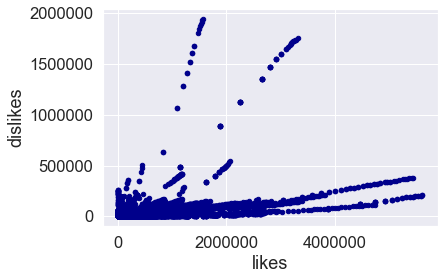

In [78]:
df.plot.scatter(x='likes',y='dislikes',c='DarkBlue') # overall likes vs dislikes scatter plot for all country dataset

In [79]:
USV['like_percentage'] = USV['likes'] / (USV['dislikes'] + USV['likes'])# Ratio of likes for US
USV.like_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40731.000000
mean         0.933103
std          0.102360
min          0.000000
5%           0.749599
25%          0.930362
50%          0.966992
75%          0.982791
95%          0.992821
max          1.000000
Name: like_percentage, dtype: float64

In [80]:
USV['dislike_percentage'] =USV['dislikes'] / (USV['dislikes'] + USV['likes']) # Ratio of dislikes and dislikes for US
USV.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40731.000000
mean         0.066897
std          0.102360
min          0.000000
5%           0.007179
25%          0.017209
50%          0.033008
75%          0.069638
95%          0.250401
max          1.000000
Name: dislike_percentage, dtype: float64

/Users/yashshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  


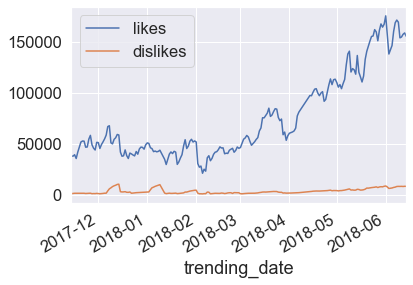

In [81]:
# Time variation test like and dislike for US videos
table = pd.pivot_table(USV, index=USV.index.labels[0])
table.index = USV.index.levels[0]
_ = table[['likes','dislikes']].plot()

In [82]:
CAV['like_percentage'] = CAV['likes'] / (CAV['dislikes'] + CAV['likes']) #likes percentile for the Canada videos
CAV.like_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40597.000000
mean         0.931900
std          0.090323
min          0.037813
5%           0.762497
25%          0.917512
50%          0.964475
75%          0.983505
95%          0.993279
max          1.000000
Name: like_percentage, dtype: float64

/Users/yashshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  


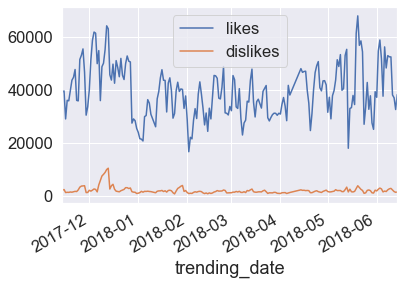

In [83]:
# Time variation test for like and dislike for Canada from the datasets
table = pd.pivot_table(CAV, index=CAV.index.labels[0])
table.index = CAV.index.levels[0]
_ = table[['likes','dislikes']].plot()

In [84]:
# From the above observation we can say that the ratio of the likes and us are mainly consistant on the scence of 
# the video's variation of the likes and dislikes percentage. In both country the likes vs dislikes is consider similler because 
# of both country has more likes than the dislikes. If we compare the country differently the likes vs dislikes is little different
#in US likes vs dislikes is is more far up  than Canada.Canada has up and down in the ratio.

In [85]:
CAV['dislike_percentage'] =CAV['dislikes'] / (CAV['dislikes'] + CAV['likes']) #dislikes percentile for the Canada videos
CAV.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40597.000000
mean         0.068100
std          0.090323
min          0.000000
5%           0.006721
25%          0.016495
50%          0.035525
75%          0.082488
95%          0.237503
max          0.962187
Name: dislike_percentage, dtype: float64

In [86]:
# 4 How long does it take a video  become trending on average? 

In [87]:
USV['days_to_trending'].head()

trending_date  video_id   
2017-11-14     2kyS6SvSYSE    4.0
               1ZAPwfrtAFY    1.0
               5qpjK5DgCt4    2.0
               puqaWrEC7tY    2.0
               d380meD0W0M    5.0
Name: days_to_trending, dtype: float64

In [88]:
CAV['days_to_trending'].head()

trending_date  video_id   
2017-11-14     n1WpP7iowLc    4
               0dBIkQ4Mz1M    1
               5qpjK5DgCt4    2
               d380meD0W0M    2
               2Vv-BfVoq4g    5
Name: days_to_trending, dtype: int64

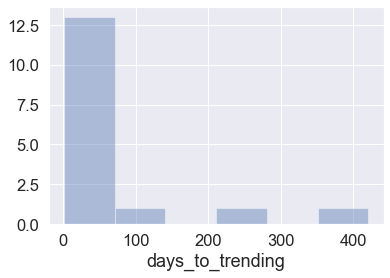

In [89]:
#Days to Trending Status in US
max_days_to_trending = USV.sample(1000).groupby('video_id').days_to_trending.max() # Notice Sampling: EDA Principle 3

_ = sns.distplot(max_days_to_trending.value_counts(),bins='rice',kde=False)

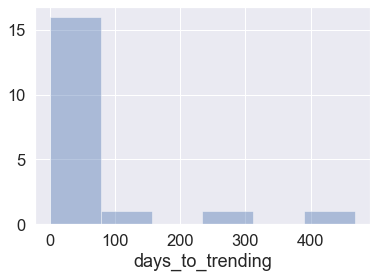

In [90]:
#Days to Trending Status in US videos
max_days_to_trending = CAV.sample(1000).groupby('video_id').days_to_trending.max() # Notice Sampling: EDA Principle 3

_ = sns.distplot(max_days_to_trending.value_counts(),bins='rice',kde=False)

In [91]:
# The purpose of this part is to find the trending status of the videos in US and Canada as We take a sample.
# The average days it takes to become videos trending is one. But there are many videos which are here for many days.
# Few videos have trending for many days. Lots of videos become trending for less than 100 days in both countries.

In [92]:
#Earvin questions

In [93]:
def print_UStop10(column_of_interest,column_stats):
    US = USV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return US.sort_values(ascending=False).head(10)

In [94]:
print_UStop10('title', 'views')


title
Childish Gambino - This Is America (Official Video)                 3758488765
Ariana Grande - No Tears Left To Cry                                1529291326
BTS (방탄소년단) 'FAKE LOVE' Official MV                                 1283188291
Becky G, Natti Natasha - Sin Pijama (Official Video)                1182971286
VENOM - Official Trailer (HD)                                       1003151226
Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]     896558471
Selena Gomez - Back To You (Lyric Video)                             818792483
Maluma - Marinero (Official Video)                                   803455479
Calvin Harris, Dua Lipa - One Kiss (Official Video)                  792843004
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                   780801040
Name: views, dtype: int64

In [95]:
USV[USV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video started trending May 8th 2018 in the US.

,,Unnamed: 0,title,category,channel_title,category_id,tags,views,likes,dislikes,publish_date,days_to_trending,like_percentage,dislike_percentage
trending_date,video_id,,,,,,,,,,,,,
2018-05-08,VYOjWnS4cMY,33351,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,2018-05-05,3.0,0.964619,0.035381
2018-05-09,VYOjWnS4cMY,33557,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,2018-05-04,5.0,0.958508,0.041492
2018-05-10,VYOjWnS4cMY,33772,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,2018-05-09,1.0,0.954383,0.045617
2018-05-11,VYOjWnS4cMY,33983,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290,2018-05-10,1.0,0.952255,0.047745
2018-05-12,VYOjWnS4cMY,34202,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,2018-05-11,1.0,0.951085,0.048915
2018-05-13,VYOjWnS4cMY,34420,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,2018-05-12,1.0,0.949420,0.050580
2018-05-15,VYOjWnS4cMY,34850,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591,2018-05-13,2.0,0.947805,0.052195
2018-05-16,VYOjWnS4cMY,35057,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,2018-05-12,4.0,0.945697,0.054303
2018-05-17,VYOjWnS4cMY,35265,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,2018-05-16,1.0,0.943004,0.056996


In [96]:
USV[USV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video started trending Decemebr 7th 2017 in the US.

,,Unnamed: 0,title,category,channel_title,category_id,tags,views,likes,dislikes,publish_date,days_to_trending,like_percentage,dislike_percentage
trending_date,video_id,,,,,,,,,,,,,
2017-12-07,FlsCjmMhFmw,4600,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,2017-12-05,2.0,0.703679,0.296321
2017-12-08,FlsCjmMhFmw,4801,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891799,884944,2017-12-04,4.0,0.681301,0.318699
2017-12-09,FlsCjmMhFmw,5020,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251797,1127798,2017-12-07,2.0,0.666292,0.333708
2017-12-10,FlsCjmMhFmw,5236,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,2017-12-09,1.0,0.662458,0.337542
2017-12-11,FlsCjmMhFmw,5452,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,2017-12-09,2.0,0.656581,0.343419
2017-12-12,FlsCjmMhFmw,5699,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,2017-12-12,0.0,0.653407,0.346593
2017-12-13,FlsCjmMhFmw,5935,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,2017-12-10,3.0,0.652928,0.347072
2017-12-14,FlsCjmMhFmw,6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,2017-12-11,3.0,0.653114,0.346886


In [97]:
def print_CAtop10(column_of_interest,column_stats):
    CA = CAV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return CA.sort_values(ascending=False).head(10)

In [98]:
print_CAtop10('title', 'views')

title
YouTube Rewind: The Shape of 2017 | #YouTubeRewind           631428335
Marvel Studios' Avengers: Infinity War Official Trailer      577553186
Childish Gambino - This Is America (Official Video)          411775069
BTS (방탄소년단) 'FAKE LOVE' Official MV                          321743622
VENOM - Official Trailer (HD)                                268913813
Marvel Studios' Avengers: Infinity War - Official Trailer    260624189
To Our Daughter                                              242252692
Luis Fonsi, Demi Lovato - Échame La Culpa                    191071336
Taylor Swift - Delicate                                      191059970
Drake - God’s Plan                                           190183754
Name: views, dtype: int64

In [99]:
CAV[CAV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video started trending May 6th 2018 in Canada.

,,Unnamed: 0,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes,days_to_trending,like_percentage,dislike_percentage
trending_date,video_id,,,,,,,,,,,,,
2018-05-06,VYOjWnS4cMY,32916,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",546527,109193,1660,0,0.985025,0.014975
2018-05-07,VYOjWnS4cMY,33114,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",14171087,801866,25829,1,0.968794,0.031206
2018-05-08,VYOjWnS4cMY,33314,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405376,51548,2,0.964619,0.035381
2018-05-09,VYOjWnS4cMY,33514,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841549,79717,3,0.958508,0.041492
2018-05-10,VYOjWnS4cMY,33714,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183745,104379,4,0.954382,0.045618
2018-05-11,VYOjWnS4cMY,33916,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478908,124291,5,0.952255,0.047745
2018-05-12,VYOjWnS4cMY,34131,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,6,0.951085,0.048915
2018-05-13,VYOjWnS4cMY,34361,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037318,161813,7,0.949420,0.050580


In [100]:
CAV[CAV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video started trending December 7th 2017 in Canada.

,,Unnamed: 0,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes,days_to_trending,like_percentage,dislike_percentage
trending_date,video_id,,,,,,,,,,,,,
2017-12-07,FlsCjmMhFmw,4597,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24784863,1149214,483943,1,0.703676,0.296324
2017-12-08,FlsCjmMhFmw,4795,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891822,884963,2,0.681299,0.318701
2017-12-09,FlsCjmMhFmw,4996,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251826,1127811,3,0.666292,0.333708
2017-12-10,FlsCjmMhFmw,5197,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656678,1353655,4,0.662458,0.337542
2017-12-11,FlsCjmMhFmw,5398,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470387,5,0.656580,0.343420
2017-12-12,FlsCjmMhFmw,5623,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125431369,2912715,1545018,6,0.653407,0.346593
2017-12-13,FlsCjmMhFmw,5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014479,1602383,7,0.652928,0.347072


In [101]:
def print_FRtop10(column_of_interest,column_stats):
    FR = FRV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return FR.sort_values(ascending=False).head(10)

In [102]:
print_FRtop10('title', 'views')

title
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                  254277636
BTS (방탄소년단) 'FAKE LOVE' Official MV                                 167542474
Childish Gambino - This Is America (Official Video)                 153765066
To Our Daughter                                                     142373811
Luis Fonsi, Demi Lovato - Échame La Culpa                           134228298
Marvel Studios' Avengers: Infinity War - Official Trailer           125990173
Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video]       106842732
Taylor Swift - End Game ft. Ed Sheeran, Future                      101740372
Maroon 5 - Girls Like You ft. Cardi B                                87083624
Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]     86904789
Name: views, dtype: int64

In [103]:
FRV[FRV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video started trending May 6 in France.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
33062,33062,VYOjWnS4cMY,2018-05-07,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",14171087,801873,25829
33261,33261,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405381,51548
33469,33469,VYOjWnS4cMY,2018-05-09,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841553,79716
33720,33720,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183745,104379


In [104]:
FRV[FRV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video started trending December 6 th 2012 in France.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
4598,4598,FlsCjmMhFmw,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",24784870,1149222,483950
4804,4804,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",52611730,1891827,884962
5040,5040,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",75969469,2251828,1127813
5342,5342,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",100911567,2656682,1353661


In [105]:
def print_GBtop10(column_of_interest,column_stats):
    GB = GBV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return GB.sort_values(ascending=False).head(10)

In [106]:
print_GBtop10('title', 'views')

title
Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon                 8201898179
Bad Bunny - Amorfoda | Video Oficial                                                       6891280759
Childish Gambino - This Is America (Official Video)                                        5984728207
Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial    5151438858
Drake - God’s Plan                                                                         4625496538
Ozuna x Romeo Santos - El Farsante Remix                                                   4396004901
Ariana Grande - No Tears Left To Cry                                                       4107436350
Ozuna - Única (Video Oficial) 🐻 A U R A                                                   3167448536
Becky G, Natti Natasha - Sin Pijama (Official Video)                                       2905182165
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                          

In [107]:
GBV[GBV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video started trending May 7th 2018 in Great Britain.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
32485,32485,VYOjWnS4cMY,2018-05-07,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",14171087,801851,25829
32646,32646,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405356,51548
32809,32809,VYOjWnS4cMY,2018-05-09,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841541,79717
32976,32976,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377
33153,33153,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290
33323,33323,VYOjWnS4cMY,2018-05-12,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711
33495,33495,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812
33783,33833,VYOjWnS4cMY,2018-05-15,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591
33870,33994,VYOjWnS4cMY,2018-05-16,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995
34029,34200,VYOjWnS4cMY,2018-05-17,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641


In [108]:
GBV[GBV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video satrted trending December 7th 2017.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
4593,4593,FlsCjmMhFmw,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24784863,1149190,483926
4794,4794,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891802,884948
4995,4995,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251807,1127802
5197,5197,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656665,1353649
5399,5399,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470384
5624,5624,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912706,1545014
5838,5838,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014473,1602383
6058,6058,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643060
6280,6280,FlsCjmMhFmw,2017-12-15,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",156305907,3140248,1668460
6506,6506,FlsCjmMhFmw,2017-12-16,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",158002943,3165234,1683321


In [109]:
def print_DEtop10(column_of_interest,column_stats):
    DE = DEV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return DE.sort_values(ascending=False).head(10)

In [110]:
print_DEtop10('title', 'views')

title
YouTube Rewind: The Shape of 2017 | #YouTubeRewind           368153846
Marvel Studios' Avengers: Infinity War Official Trailer      315890909
BTS (방탄소년단) 'FAKE LOVE' Official MV                          241005611
Childish Gambino - This Is America (Official Video)          227197666
To Our Daughter                                              191009543
Marvel Studios' Avengers: Infinity War - Official Trailer    168852290
VENOM - Official Trailer (HD)                                164404929
Maluma - El Préstamo (Official Video)                        157237221
Ariana Grande - No Tears Left To Cry                         114816843
Drake - God’s Plan                                           112993132
Name: views, dtype: int64

In [111]:
DEV[DEV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video started trending May 6 2018 in Germany.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
33133,33133,VYOjWnS4cMY,2018-05-07,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",14171087,801859,25829
33333,33333,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405366,51548
33534,33534,VYOjWnS4cMY,2018-05-09,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841545,79717
33746,33746,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377
34104,34104,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,Music,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478908,124291


In [112]:
DEV[DEV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video started trending December 6 th 2017.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
4599,4599,FlsCjmMhFmw,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24784863,1149204,483937
4799,4799,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891817,884959
5004,5004,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251819,1127810
5221,5221,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656675,1353652
5455,5455,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470386


In [113]:
def print_INtop10(column_of_interest,column_stats):
    IN = INV.groupby(column_of_interest)['views'].apply(lambda x: x.astype(int).sum())
    return IN.sort_values(ascending=False).head(10)

In [114]:
print_INtop10('title', 'views')

title
Marvel Studios' Avengers: Infinity War Official Trailer                                           577552394
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                                                493586083
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                         407634578
VENOM - Official Trailer (HD)                                                                     399787896
Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June               304815182
Marvel Studios' Avengers: Infinity War - Official Trailer                                         233633678
Official Video: Raat Kamaal Hai | Guru Randhawa & Khushali Kumar | Tulsi Kumar | New Song 2018    205275034
Baaghi 2 Official Trailer | Tiger Shroff | Disha Patani | Sajid Nadiadwala | Ahmed Khan           196734741
DJ (Duvvada Jagannadham) 2017 New Released Full Hindi Dubbed Movie | Allu Arjun, Pooja Hegde      189327856
Taylor Swift - Delicat

In [115]:
INV[INV['title'] == 'Childish Gambino - This Is America (Official Video)']
#This video didnt trend during this period in India.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes


In [116]:
INV[INV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
#This video started trending December 6 th 2017.

,Unnamed: 0,video_id,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes
4412,4459,FlsCjmMhFmw,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24784863,1149198,483933
4521,4568,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891811,884954
4696,4743,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251815,1127805
4889,4936,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656672,1353650
5072,5119,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811216,1470387
5361,5408,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017


In [117]:
#The first video started trending in France, Canada, and Germany first (May 6th 2018), and later to Great Britain (May 7th 2018)
#,and finally in the US (May 8th 2018). 
#I have no good theory on that.
#I notice however that both France and Canada are french speaking countries and the video started trending there first.
#I am not sure if it has any valuable meaning though.

In [118]:
#The second video started trending in France, Germany, and India first (December 6th 2017),
#then later started trending in the US, Great Britaing, and Canada.

In [119]:
USV_data = USV[['title', 'views']]
CAV_data = CAV[['title', 'views']]
GBV_data = GBV[['title', 'views']]
FRV_data = FRV[['title', 'views']]
DEV_data = DEV[['title', 'views']]
INV_data = INV[['title', 'views']]


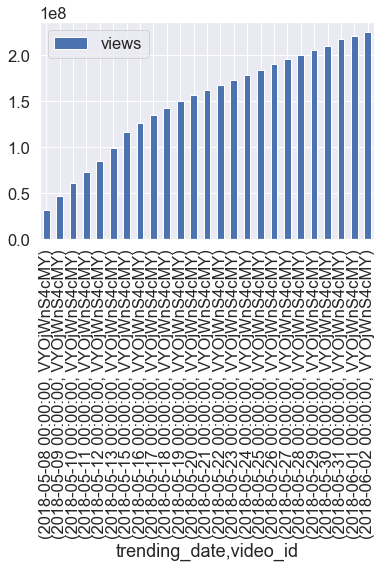

In [120]:
USV[USV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#This video started trending may 8th 2018.

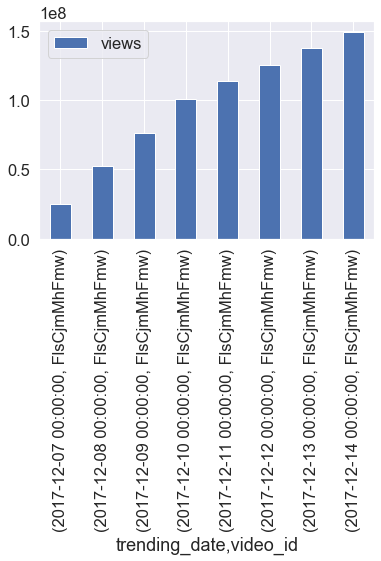

In [121]:
USV[USV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#This video started trending December 7th 2018.

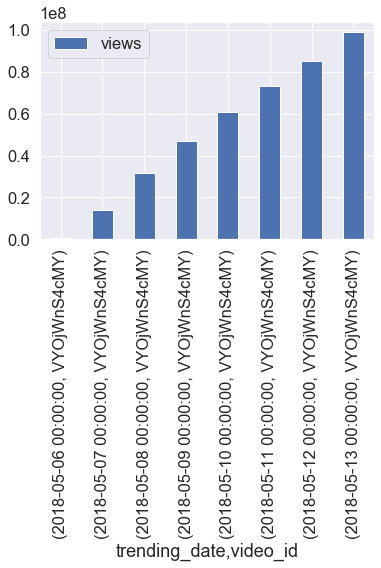

In [122]:
CAV[CAV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#This video started trending May 6th 2018 in Canada.

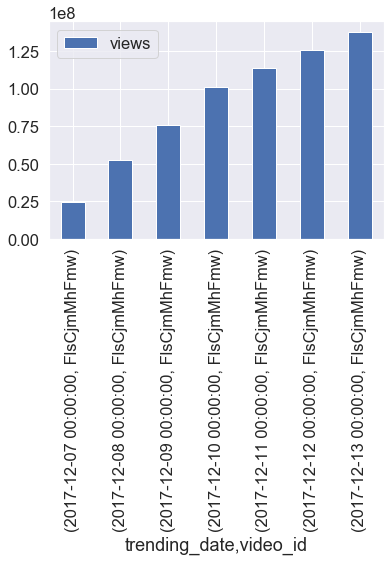

In [123]:
CAV[CAV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#THis video started trending December 7th 2017 in Canada.

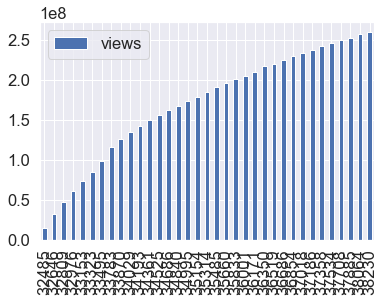

In [124]:
GBV[GBV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 

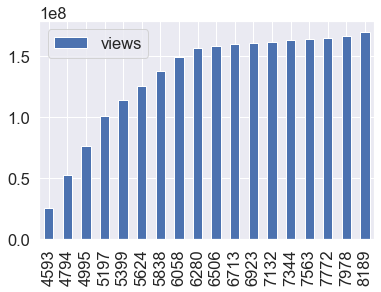

In [125]:
GBV[GBV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 

In [ ]:
FRV[FRV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 

In [ ]:
FRV[FRV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 


In [ ]:
DEV[DEV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 

In [ ]:
DEV[DEV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#I wasn't able to display the dates on this graph. 

In [ ]:
#INV[INV['title'] == 'Childish Gambino - This Is America (Official Video)'].plot(kind = 'bar', y = 'views')
#No plot is displayed because that video has no trend in India during that period.

In [ ]:
INV[INV['title'] == 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'].plot(kind = 'bar', y = 'views')
#I wasn't able to do a plot with the dates on.

In [ ]:
#My plot weren't succesful because I couldnt show effectivelly the trending dates.

In [ ]:
US_channels = USV.groupby(['channel_title'])

In [ ]:
print_UStop10('channel_title', 'views')

In [ ]:
USV[USV['channel_title'] == 'ChildishGambinoVEVO'].groupby(['video_id']).plot(kind = 'bar', y = 'views')
#This channel only has one video, which start trending May, 8th 2018 and continues to trend until June, 2nd 2018.

In [ ]:
USV[USV['channel_title'] == 'ibighit'].groupby(['video_id']).plot(kind = 'bar', y = 'views')
#This channel has 9 videos that have been trending for different length of time
#The first video only trended for 2 days, June 17th and June 18th 2018, however that is where our data ends.
#So we do no know when the video stopped trending. 
#However, we can see that from March to May 2018 this channel has had at least 1 videos that trend each moth


In [ ]:
USV[USV['channel_title'] == 'Dude Perfect'].groupby(['video_id']).plot(kind = 'bar', y = 'views')
#This channel has 10 videos that are trending during the period of this study
#Beside one, every month from December 2017 to May 2018,
#this channel has a video that trends mid/end of the months for at least a week.

In [ ]:
#Yash Questions

In [ ]:
read1=pd.read_csv("CAV.csv")
read2=pd.read_csv("DEV.csv")
read3=pd.read_csv("FRV.csv")
read4=pd.read_csv("USV.csv")
read5=pd.read_csv("INV.csv")
data_raw= pd.concat([read1,read2,read3,read4,read5],axis=0)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import random
from datetime import time
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
data_raw.head(5)

In [ ]:
data_raw.head(5)

In [ ]:
#plot to show the most viewied catagories
byviews = data_raw.groupby('category_id').mean().reset_index().sort_values('views', ascending=False)
plt.figure(figsize=(12, 3))
sns.barplot(data=byviews, x='category_id', y='views', ci=None)
plt.xticks(rotation=90)

Shows  Music and Movies get the most views while Pets & Animals, and Shows have the least amount of views.

In [ ]:
#plot to show that the number of trending videos from each category  
sns.countplot(x='category_id', data=data_raw)
plt.xticks(rotation=90)

The category that becomes trending most is entertainment. 

In [ ]:
category_json = pd.read_json("US_category_id.JSON")
category_json.head(5)

In [ ]:
#creates category dictonary
category_dict = [{'id': item['id'], 'title': item['snippet']['title']} for item in category_json['items']]
category_dict

In [ ]:
#creates a dictonary with category_# and Category
category_df = pd.DataFrame(category_dict)
categories = category_df.rename(index=str, columns = {"id":"category_#","title":"Category"})
categories.head(45)

In [ ]:
#plot to show the most viewied catagories
byviews = categories.groupby('Category').mean().reset_index().sort_values('views', ascending=False)
plt.figure(figsize=(12, 3))
sns.barplot(data=byviews, x='category_id', y='views', ci=None)
plt.xticks(rotation=90)

In [ ]:
#keeps the colums that will be needed and renames them
dataframe1 = ['title', 'category_id']
dataframe = data_raw[dataframe1]
dataframe.to_csv("AllCountrys.csv", index=False)
dataframe = pd.read_csv("AllCountrys.csv", names=['Title', 'Category_ID'])

In [ ]:
#imports the needed packages

import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Convert a collection of text documents to a matrix of token counts
countVectorizer = CountVectorizer()
enumeration = countVectorizer.fit_transform(dataframe['Title'].values)

In [ ]:
NaiveBayesModel = MultinomialNB()

In [ ]:
category = dataframe['Category_ID'].values

In [ ]:
#uses naive bayes model to fit the data with enumeration and category
NaiveBayesModel.fit(enumeration,category)

In [ ]:
# Sets X equal to enumeration, and Y equal to category then splits the training data
X = enumeration
Y = category
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1)


In [ ]:
#Prints out the accuracy of the Naive Bayes classifer 
Naive_Test = MultinomialNB().fit(X_train,Y_train)
Naive_Predict = Naive_Test.predict(X_test)
actual_score = Naive_Test.score(X_test, Y_test)
print('The Naive Bayes Classifer has an accuracy of', actual_score)

In [ ]:
#Creates a title to test 
Titles = ["Kobe Bryant"]

In [ ]:
#Testing

#Inserting above title into classifier model
Titles_enumeration = countVectorizer.transform(Titles)

#Naive Bayes Model
PredictNB = NaiveBayesModel.predict(Titles_enumeration)
PredictNB

#Output will be an array of numbers. Iterate through the Category Dictionary (from JSON file) to find "title"
NameList = []
for Category_ID in PredictNB:
    CatChecker = [x for x in category_dict if x["id"] == str(Category_ID)]
    if CatChecker:
        NameList.append(CatChecker[0]["title"])
        
#Mapping the values to the Titles we want to Predict
TitleDataFrameNB = []
for i in range(0, len(Titles)):
    TitlestoCat = {'Title': Titles[i],  'Category': NameList[i]}
    TitleDataFrameNB.append(TitlestoCat)

#Changing the dictionary to a dataframe
PredictDFnb = pd.DataFrame(PredictNB)
TitleDFnb = pd.DataFrame(TitleDataFrameNB)
PreTitle_Aticipate = pd.concat([PredictDFnb, TitleDFnb], axis=1)
PreTitle_Aticipate.columns = (['Categ_ID', 'Predicted Category', 'Made-Up Video Title'])
Title_Aticipate = PreTitle_Aticipate.drop(['Categ_ID'],axis=1)
LastClassifer = Title_Aticipate.columns.tolist()
LastClassifer = LastClassifer[-1:] + LastClassifer[:-1]
Title_Aticipate= Title_Aticipate[LastClassifer]


Title_Aticipate

In [ ]:
#References 
#https://medium.com/@brianasaba07/analysing-the-youtube-trending-videos-dataset-951f4f4edc33
#https://github.com/PrashantMohan9/Youtube-Category-Prediction/blob/master/Final_Version.ipynb
#https://www.kaggle.com/yanpapadakis/trending-youtube-video-metadata-analysis/notebook
#https://github.com/chefdarek/Youtube_Category_Predictor/blob/master/Youtube_Category%20_Labeling_Models.ipynb
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html